In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata

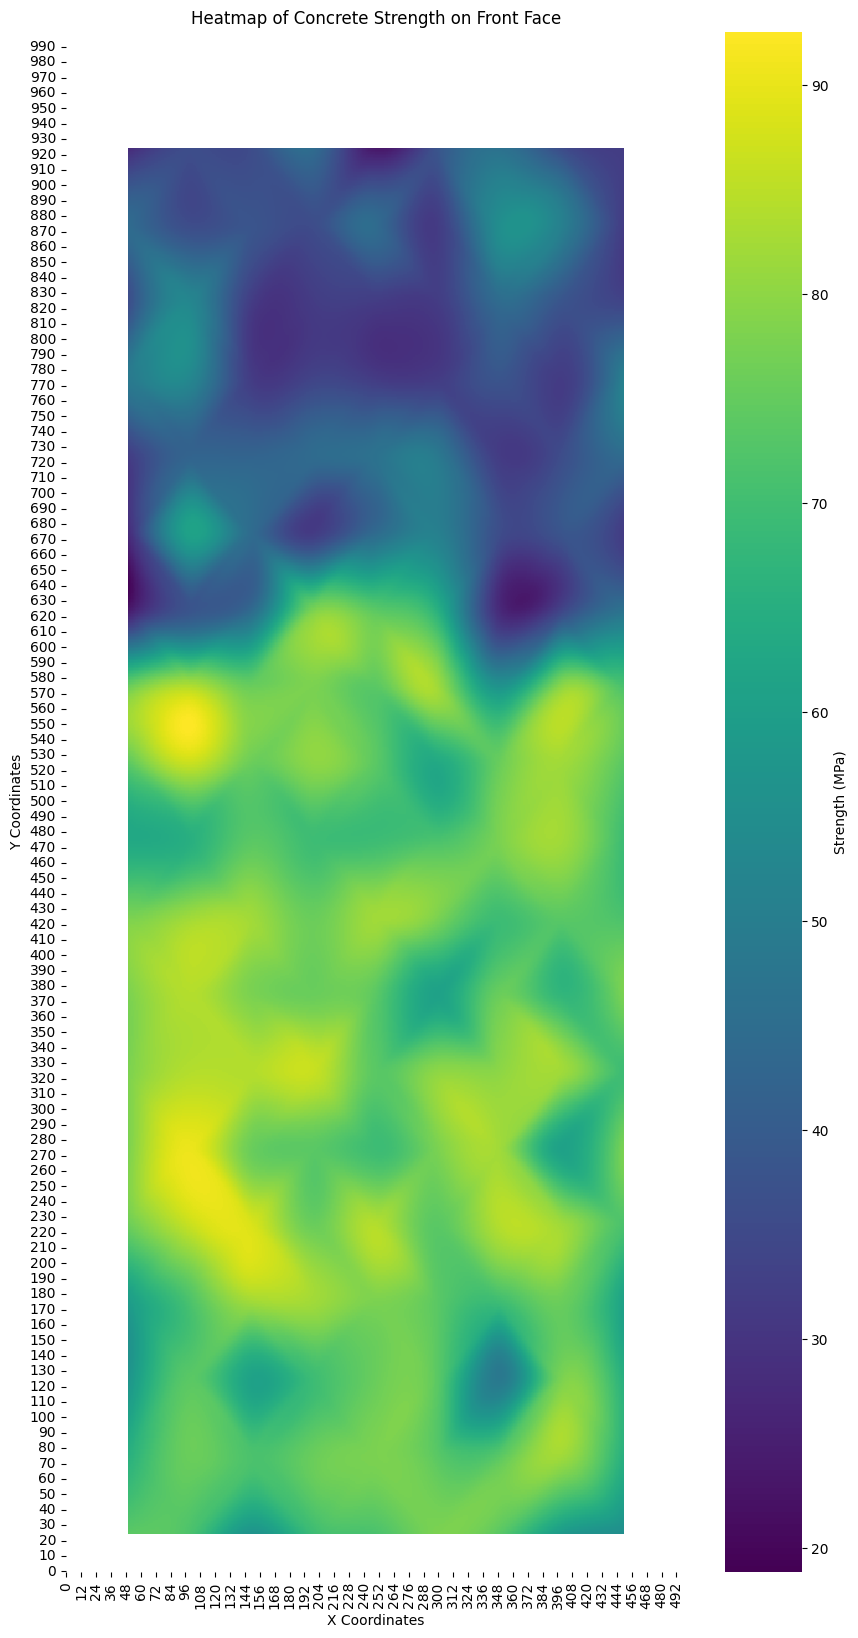

In [37]:
import pandas as pd
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./concrete_front_face.csv')

x_coords = []
y_coords = []
rebound_numbers = []

for index, row in data.iterrows():
    for col_index, value in enumerate(row):
        if value != 0:  # Exclude zero values otherwise it looks shit
            x_coords.append(col_index * 25)  
            y_coords.append(index * 25) 
            rebound_numbers.append(value)

# Convert to numpy arrays
x_coords = np.array(x_coords)
y_coords = np.array(y_coords)
rebound_numbers = np.array(rebound_numbers)

# Creating the grid
grid_x, grid_y = np.mgrid[0:500:500j, 0:1000:1000j]

# Scipy interpolate
grid_z = griddata((x_coords, y_coords), rebound_numbers, (grid_x, grid_y), method='cubic')

matrix_data = grid_z.T  # Transpose to match orientation correct

plt.figure(figsize=(10, 20))
sns.heatmap(matrix_data_excl_zeros, cmap='viridis', cbar_kws={'label': 'Strength (MPa)'}, vmin=np.nanmin(matrix_data_excl_zeros), vmax=np.nanmax(matrix_data_excl_zeros))
plt.title('Heatmap of Concrete Strength on Front Face')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.gca().invert_yaxis()
plt.show()
